In [10]:
import math
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

In [11]:
yf.pdr_override()
df = pdr.get_data_yahoo('AAPL', start='2015-01-01', end='2021-05-02')

[*********************100%***********************]  1 of 1 completed


In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.782110,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.083958,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.086227,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.423975,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.362394,237458000
...,...,...,...,...,...,...
2021-04-26,134.830002,135.059998,133.559998,134.720001,134.290359,66905100
2021-04-27,135.009995,135.410004,134.110001,134.389999,133.961395,66015800
2021-04-28,134.309998,135.020004,133.080002,133.580002,133.153992,107760100


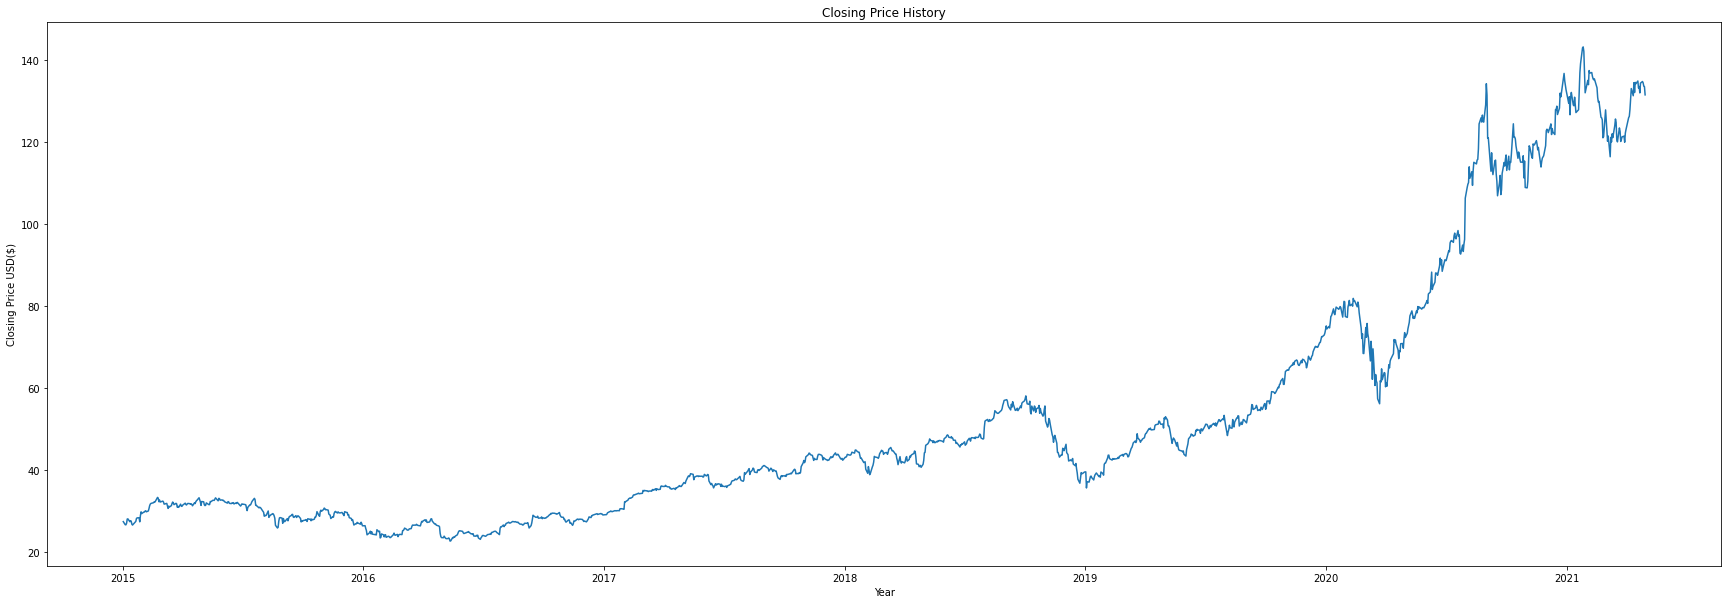

In [13]:
plt.figure(figsize=(30,10))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Year')
plt.ylabel('Closing Price USD($)')
plt.show()

In [14]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

In [16]:
train_data = scaler_data[0:training_data_len]
x_train, y_train = [],[]
for i in range(60,training_data_len):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

In [21]:
history = model.fit(x_train, y_train, batch_size=1, epochs=1)

1215/1215 [==============================] - 49s 24ms/step - loss: 8.6665e-04 - accuracy: 6.3873e-04


In [22]:
print(history.history['accuracy'][0]*100000)

82.30452658608556


In [23]:
test_data = scaler_data[training_data_len - 60: ,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [24]:
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1],1))

In [25]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [26]:
rmse = np.sqrt(np.mean( predictions-y_test )**2 )
rmse

2.372734765586613

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


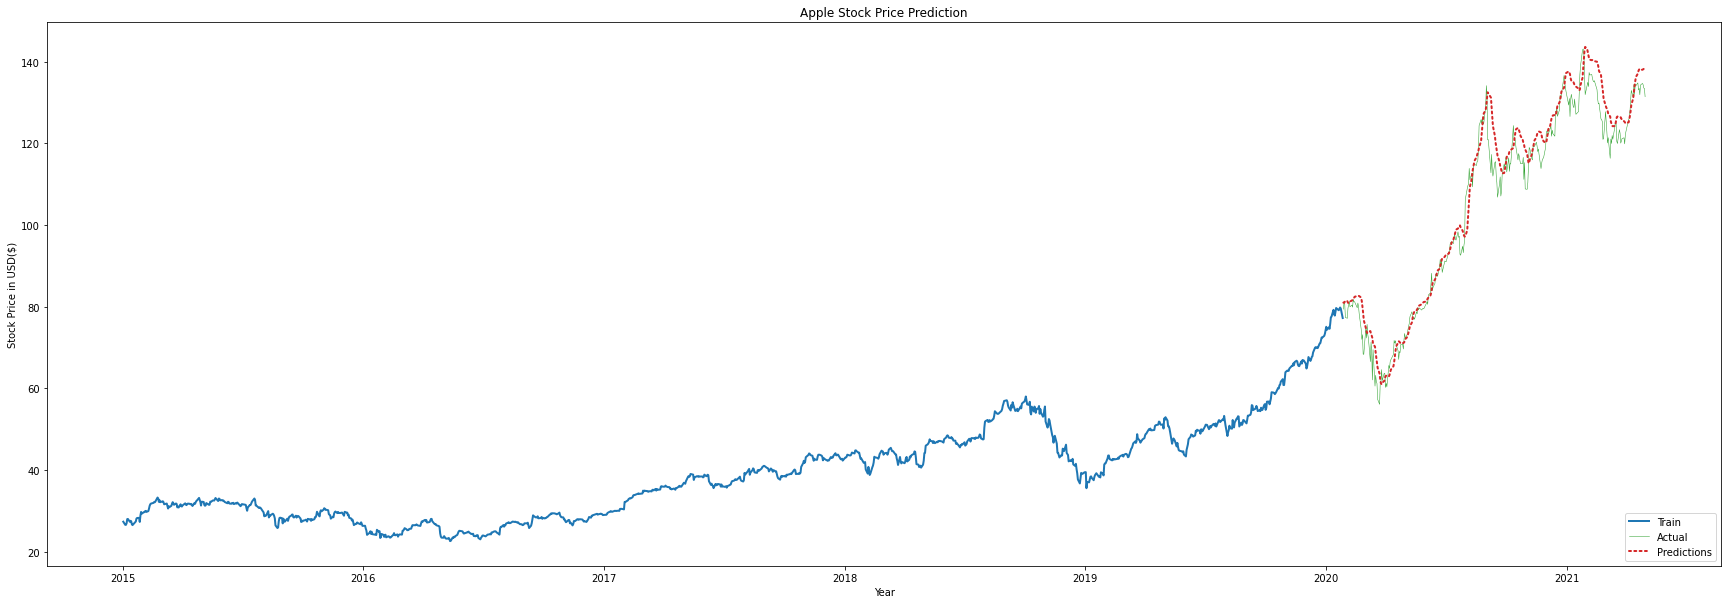

In [91]:
plt.figure(figsize=(30,10))
plt.title('Apple Stock Price Prediction')
plt.xlabel('Year')
plt.ylabel('Stock Price in USD($)')
plt.plot(train['Close'],'C0',lw=2)
plt.plot(valid[['Close']],'C2',lw=0.5)
plt.plot(valid[['Predictions']],'C3',lw=2,dash_capstyle='round',ls=':',antialiased='false')
plt.legend(['Train','Actual','Predictions'], loc='lower right')

In [29]:
valid

,Close,Predictions
Date,,
2020-01-28,79.422501,81.014641
2020-01-29,81.084999,80.962631
2020-01-30,80.967499,81.179909
2020-01-31,77.377502,81.492004
2020-02-03,77.165001,81.357132
...,...,...
2021-04-26,134.720001,138.060028
2021-04-27,134.389999,138.169327
2021-04-28,133.580002,138.279663
